# Lab: Regression

## Exercise 5: Multivariate Linear Regression on real data 


> In the previous exercises you worked with datasets consist of one or two input variables. However, in the real world, we usually begin with raw data containing many more input features which may or may not be all suitable for prediction and/or classification.

> In this exercise, you are provided hourly rental data spanning two years. The training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

Data Fields

* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather:
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

#### Ask your questions by e-mail to: Azarakhsh.Jalalvand@UGent.be


In [20]:
import numpy as np
import pandas
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import  train_test_split
import matplotlib.pylab as plt
from datetime import datetime
from sklearn.metrics import mean_squared_error

# 1. Data Preparation

## 1a. Let's first read and explore our data which is in CSV format. 
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

### Read the training dataset (Bike_train.csv) as a variable named "dataset"

In [2]:
dataset = pandas.read_csv('./Bike_train.csv', sep=",")

### Question 1: How many records and features are in this CSV?
* Check out the first 10 rows of the data

In [3]:
print "#:", dataset.shape[0]
dataset.head(10)

#: 10886


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


### Question 2: What is the range of the datetime column (earliest and latest date)

In [4]:
dates = dataset['datetime'].apply(lambda x : datetime.strptime(x, "%Y-%m-%d %H:00:00"))
print "Earliest date:", dates.min()
print "Latest date:", dates.max()

Earliest date: 2011-01-01 00:00:00
Latest date: 2012-12-19 23:00:00


### Question 3: Is there any NULL values in the data?

In [5]:
# hint: check the outputs of dataset.count() and dataset.columns.
dataset.isnull().values.any()

False

### 1b. Characteristics of the data columns

* Make a summary of the dataset: min, max, mean,... per column
* Make a plot of the distribution of the values in the different columns, the Y-axis should be logarithmic

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.96047

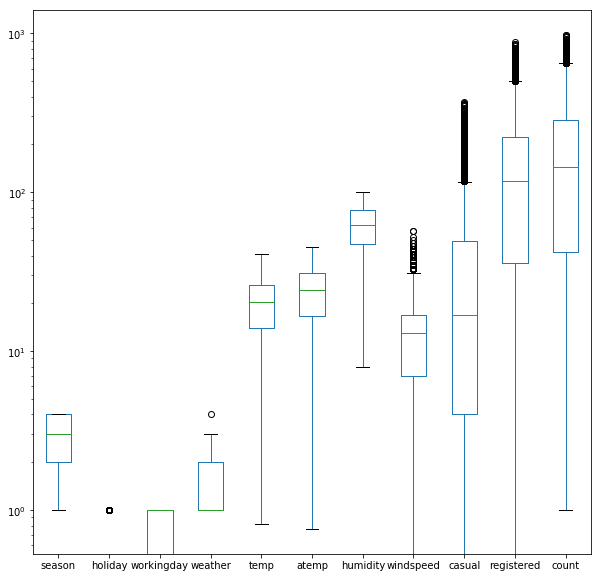

In [6]:
print(dataset.describe())
dataset.plot.box(logy = True, figsize=(10,10))
plt.show()

#dataset.describe().drop('count').transpose().plot.bar(logy = True)
#dataset.describe().transpose().plot.bar(stacked = True, logy = True)
#dataset['season'].describe()
#dataset_X = dataset.drop('count')
#for column in dataset:
#    plt.scatter(dataset[column], dataset['count'])
#plt.show()

* Identify the data types, what columns are categorical, ordinal and numeric? (checking for unique values)

In [7]:
# hint: check out the unique values of each column. The categorical and/or ordinal variables have very few unique values.
# dataset['count'].value_counts()
for column in dataset:
    print column, ":", len(dataset[column].unique())
    # print column, ":", dataset[column].unique()

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


A categorical variable (sometimes called a nominal variable) is one that has two or more categories, but there is no intrinsic ordering to the categories.

An ordinal variable is similar to a categorical variable.  The difference between the two is that there is a clear ordering of the variables.

An interval variable is similar to an ordinal variable, except that the intervals between the values of the interval variable are equally spaced.

Source: https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/

C: holiday, weather, workingday

O: season

I: datetime, cout, registered, casual, windspeed, humidity, temp

# 2. Apply multivariate linear regression and do the forecast

* There are three variables to predict namely, "casual", "registered" and "count". The other variables can be used as the input features for the regression.

## Split the data into training and validation data by applying cross-validation
## 2b. Try different combinations of input variables to predict the number of rentals.
> Answer: When adding certain variables, some give a lower RMSE and others a higher one.
### Evaluate the model by calculating the root mean squared error on the training and validation data
### Question 4: Which combinations of input features do lead to better results?
> Answer: Removing "temp" gives better results
### Question 5: Are all the input features necessary for a good prediction?
> Answer: No, workingday or weather is not needed, RMSE doesn't change

In [8]:
# define a SGDRegressor
clf = SGDRegressor(max_iter = 1000, penalty = 'none', learning_rate = 'invscaling', eta0 = 0.01)

# determine which columns are going to be used as inputs and which column to predict
X = dataset.drop(['casual', 'registered', 'count'], axis = 1)
y = dataset[['count']].values.ravel()
#print y
#print dataset[['count']]

X['datetime'] = X['datetime'].apply(lambda x : datetime.strptime(x, "%Y-%m-%d %H:00:00").hour).values

# split the data into training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.80, random_state=0)

# train the regressor on training data
clf.fit(X_train, y_train)

# print the coefficients and intercept
w = clf.coef_
b = clf.intercept_
print "Intercept:", b
print "Coefficients:", w

Intercept: [39.80818722]
Coefficients: [ 10.70611918  20.59911111 -12.37803962   3.31175404  -2.99009275
   2.28447447   2.97141339   0.72338673   0.16606966]


In [9]:
# print RMSE for the prediction of both training and validation sets
y_predict = clf.predict(X_test)
rmse = np.sqrt(np.mean((y_predict - y_test)**2))
rmse2 = np.sqrt(mean_squared_error(y_predict, y_test))
print "RMSE:", rmse
print "RMSE2:", rmse2

RMSE: 243.67898930048008
RMSE2: 243.67898930048008


In [10]:
# example of different input
# clf = SGDRegressor(max_iter = 1000, penalty = 'none', learning_rate = 'invscaling', eta0 = 0.01)
# X = dataset.drop(['casual', 'registered', 'count', 'datetime'], axis = 1)
# y = dataset[['count']].values.ravel()
# X['hour'] = pandas.to_datetime(dataset['datetime']).dt.hour #hour
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.80, random_state=0)
# clf.fit(X_train, y_train)
# w = clf.coef_
# b = clf.intercept_
# print "Intercept:", b
# print "Coefficients:", w
# y_predict = clf.predict(X_test)
# rmse = np.sqrt(np.mean((y_predict - y_test)**2))
# rmse2 = np.sqrt(mean_squared_error(y_predict, y_test))
# print "RMSE:", rmse
# print "RMSE2:", rmse2

## 2c. correlations between the features 

* What is the correlation between the different features
* Assume that Y is the variable we want to predict, what feature has the highest (abs) correlation? (exclude casual and registered)
* Plot the correlation matrix (use matshow or pcolor functions)
* Some features are highly correlated, which implies a linear dependency. Including dependent features into the same linear model is to be avoided
### Question 6: which features would you exclude based on the correlation values?
* A correlation matrix will mainly reveal linear relationships, use a scatterplot matrix to study the relations between the different weather parameters 

Correlationmatrix:
            datetime    season   holiday  workingday   weather      temp  \
datetime    1.000000 -0.006546 -0.000354    0.002780 -0.022740  0.145430   
season     -0.006546  1.000000  0.029368   -0.008126  0.008879  0.258689   
holiday    -0.000354  0.029368  1.000000   -0.250491 -0.007074  0.000295   
workingday  0.002780 -0.008126 -0.250491    1.000000  0.033772  0.029966   
weather    -0.022740  0.008879 -0.007074    0.033772  1.000000 -0.055035   
temp        0.145430  0.258689  0.000295    0.029966 -0.055035  1.000000   
atemp       0.140343  0.264744 -0.005215    0.024660 -0.055376  0.984948   
humidity   -0.278011  0.190610  0.001929   -0.010880  0.406244 -0.064949   
windspeed   0.146631 -0.147121  0.008409    0.013373  0.007261 -0.017852   

               atemp  humidity  windspeed  
datetime    0.140343 -0.278011   0.146631  
season      0.264744  0.190610  -0.147121  
holiday    -0.005215  0.001929   0.008409  
workingday  0.024660 -0.010880   0.013373  


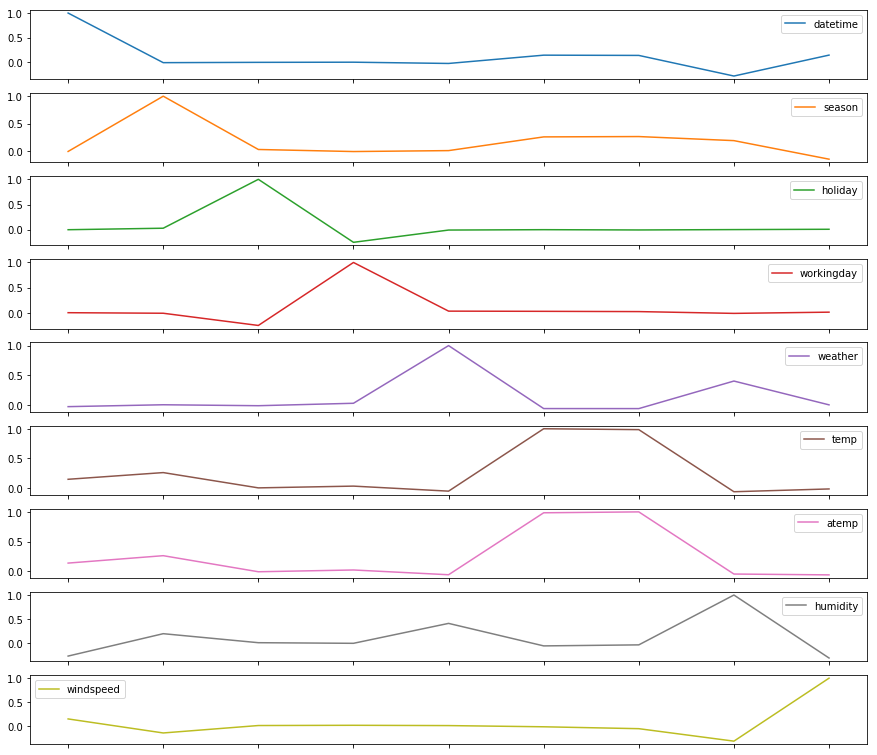

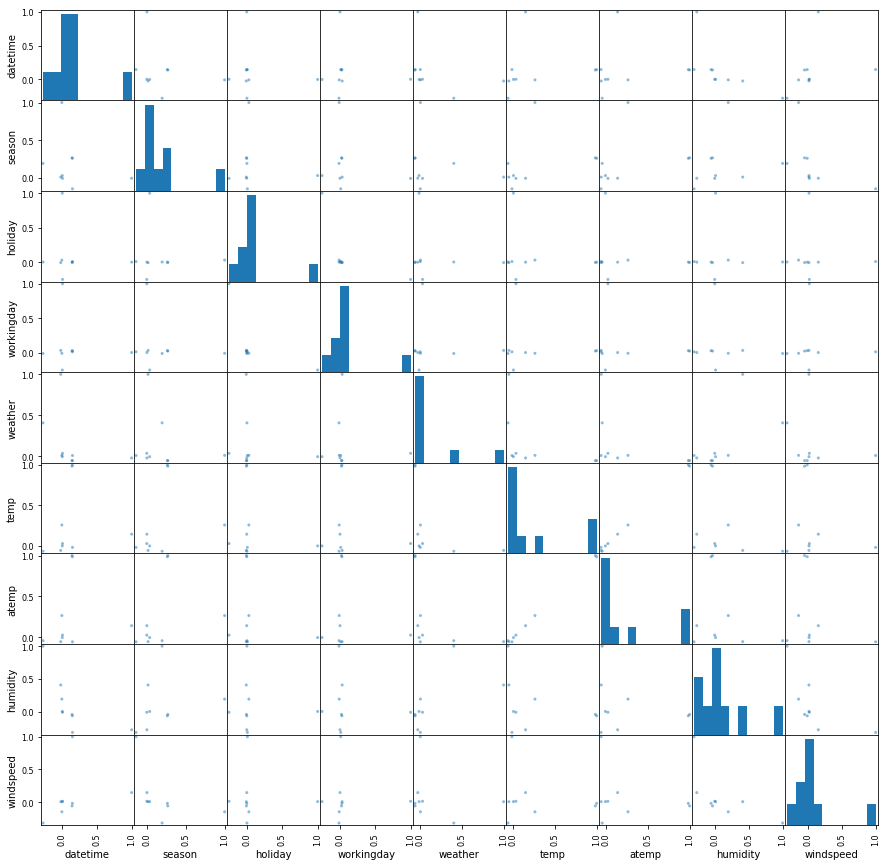

In [11]:
print "Correlationmatrix:"
print X.corr()
# windspeed = low
# season = high

X.corr().plot(subplots = True, figsize=(15,15))
pandas.plotting.scatter_matrix(X.corr(), figsize=(15,15))
plt.show()

# 3. Feature engineering to train a multivariate linear regression model

### 3a. Using categorical data in a linear model using one-hot encoding

If we would turn categorical values into numbers we are making an important mistake. The new represention imposes a certain ordering which the original representation does not! An approach to deal with this is called <b>one-hot encoding</b>. This technique uses binary features for each possible value of the feature. Assume that our categorical variable contains hobbies and we have 4 possible hobbies => we have 4 features, all zero except one for each different hobby: hobby1 -> 1000, hobby2 -> 0100,...

* Pandas has a convenient function 'get_dummies' in which you can automatically rework a categorical column, use it to transform the season column and rename the columns to the corresponding season

* use boolean filters to check if the mapping is done appropriately

* Create two dataframes dfX and dfY containing the input variables and the response variables seperately, the datetime column can be left out for dfX


In [12]:
# use pd.get_dummies to transform the season column and rename the new columns(see example below)
dataset_cat = pandas.get_dummies(dataset, columns=["season"])
dataset_ren = dataset_cat.rename(columns = {'season_1':'winter', 'season_2':'spring', 'season_3':'summer', 'season_4':'autumn',})

# Create two dataframes dfX and dfY as described above
dfX = dataset_ren.drop(['casual', 'registered', 'count', 'datetime'], axis = 1)
dfX['hour'] = pandas.to_datetime(dataset['datetime']).dt.hour
dfY = dataset_ren[['count']].values.ravel()
dfX.head(5)

,holiday,workingday,weather,temp,atemp,humidity,windspeed,winter,spring,summer,autumn,hour
0,0,0,1,9.84,14.395,81,0.0,1,0,0,0,0
1,0,0,1,9.02,13.635,80,0.0,1,0,0,0,1
2,0,0,1,9.02,13.635,80,0.0,1,0,0,0,2
3,0,0,1,9.84,14.395,75,0.0,1,0,0,0,3
4,0,0,1,9.84,14.395,75,0.0,1,0,0,0,4


### 3b. Feature scaling

* Read: https://en.wikipedia.org/wiki/Feature_scaling
* Summarized: bring all features on the same scale: 
    - otherwise some machine learning classifier based on euclidean distances will not work properly (the distance will be dominated by the feature with the most extreme values) 
    - otherwise the convergence of gradient descent algorithms (used for minimizing the cost function J) will take much longer to converge.

* Map every numerical input feature to a range [0,1] with the following formula: 

    ### $x' = \frac{x - x_{min}}{ x_{max}-x_{min}}$



In [13]:
# df_norm = dfX.copy()
# df_norm['count'] = (dfX['count'] - dfX['count'].min()) / (dfX['count'].max() - dfX['count'].min())
# df_norm['registered'] = (dfX['registered'] - dfX['registered'].min()) / (dfX['registered'].max() - dfX['registered'].min())
# df_norm['casual'] = (dfX['casual'] - dfX['casual'].min()) / (dfX['casual'].max() - dfX['casual'].min())
# df_norm['windspeed'] = (dfX['windspeed'] - dfX['windspeed'].min()) / (dfX['windspeed'].max() - dfX['windspeed'].min())
# df_norm['humidity'] = (dfX['humidity'] - dfX['humidity'].min()) / (dfX['humidity'].max() - dfX['humidity'].min())
# df_norm['atemp'] = (dfX['atemp'] - dfX['atemp'].min()) / (dfX['atemp'].max() - dfX['atemp'].min())
# df_norm['temp'] = (dfX['temp'] - dfX['temp'].min()) / (dfX['temp'].max() - dfX['temp'].min())

columns = ['weather', 'temp', 'atemp', 'humidity', 'windspeed', 'hour']
for c in columns:
    dfX[c] = (dfX[c] - dfX[c].min())/(dfX[c].max() - dfX[c].min())

#df_norm = (dfX - dfX.min()) / (dfX.max() - dfX.min())
#df_norm.head(10)
dfX.head(10)

,holiday,workingday,weather,temp,atemp,humidity,windspeed,winter,spring,summer,autumn,hour
0,0,0,0.000000,0.224490,0.305068,0.81,0.000000,1,0,0,0,0.000000
1,0,0,0.000000,0.204082,0.288064,0.80,0.000000,1,0,0,0,0.043478
2,0,0,0.000000,0.204082,0.288064,0.80,0.000000,1,0,0,0,0.086957
3,0,0,0.000000,0.224490,0.305068,0.75,0.000000,1,0,0,0,0.130435
4,0,0,0.000000,0.224490,0.305068,0.75,0.000000,1,0,0,0,0.173913
5,0,0,0.333333,0.224490,0.271171,0.75,0.105325,1,0,0,0,0.217391
6,0,0,0.000000,0.204082,0.288064,0.80,0.000000,1,0,0,0,0.260870
7,0,0,0.000000,0.183673,0.271171,0.86,0.000000,1,0,0,0,0.304348
8,0,0,0.000000,0.224490,0.305068,0.75,0.000000,1,0,0,0,0.347826
9,0,0,0.000000,0.306122,0.372860,0.76,0.000000,1,0,0,0,0.391304


### 3c. Create new multivariate models using the engineered features.
### Question 7: Do you see any improvement in the performance? why? 

In [16]:
# define a SGDRegressor
clf = SGDRegressor(max_iter = 1000, penalty = 'none', learning_rate = 'invscaling', eta0 = 0.01)
# split the data into training and validation
#X_train, X_test, y_train, y_test = train_test_split(df_norm, dfY, train_size= 0.80, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, train_size= 0.80, random_state=0)
# train the regressor on training data
clf.fit(X_train, y_train)
# print the coefficients and intercept
w = clf.coef_
b = clf.intercept_
print "Intercept:", b
print "Coefficients:", w

Intercept: [44.68319571]
Coefficients: [  -8.8608083    -0.49777452  -18.04798882  263.71927624  107.21398026
 -211.58737713    0.39805843   -6.33873284    7.86872376  -19.52162791
   62.67483269  168.9450001 ]


In [17]:
# print RMSE for the prediction of both training and validation sets
y_predict = clf.predict(X_test)

rmse = np.sqrt(np.mean((y_predict - y_test)**2))
print "RMSE:", rmse
rmse2 = np.sqrt(mean_squared_error(y_test,y_predict))
print "RMSE2:", rmse2

RMSE: 148.52473298494797
RMSE2: 148.52473298494797


# 4. Evaluation of Model performance

* Read the test dataset (Bike_test.csv)
* Apply the same feature engineering techniques on the test data.
* Evaluate your best model from the previous step on the test data and report the performance.

### QUestion 8: Is there a significant difference between the results on validation set and the test set? 

In [18]:
dataset2 = pandas.read_csv('./Bike_test.csv', sep=",")
dataset_cat = pandas.get_dummies(dataset2, columns=["season"])
dataset_ren = dataset_cat.rename(columns = {'season_1':'winter', 'season_2':'spring', 'season_3':'summer', 'season_4':'autumn',})

# Create dfX
dfX = dataset_ren.drop(['datetime'], axis = 1)
dfX['hour'] = pandas.to_datetime(dataset2['datetime']).dt.hour

columns = ['weather', 'temp', 'atemp', 'humidity', 'windspeed', 'hour']
for c in columns:
    dfX[c] = (dfX[c] - dfX[c].min())/(dfX[c].max() - dfX[c].min())

In [19]:
y_predicted = clf.predict(dfX)
print (y_predicted)

[ 27.57518791  39.60330074  46.94873553 ... 174.89567795 193.92139304
 178.59675171]
